Elapsed = 4.07235312461853 s


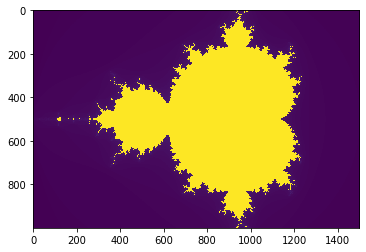

In [13]:
# Without Numba
import timeit
from matplotlib.pylab import imshow, ion
import numpy as np
import time

def mandel(x, y, max_iters):
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
# %timeit create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20))
start = time.time()
img = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
end = time.time()
imshow(img)
print("Elapsed = %s s" % (end - start))

Elapsed = 0.22748589515686035 s


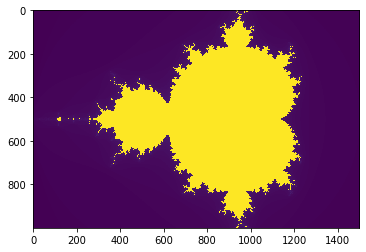

In [17]:
# With Numba
import timeit
from matplotlib.pylab import imshow, ion
import numpy as np
import time
from numba import njit

@njit
def mandel(x, y, max_iters):
    """
    Given the real and imaginary parts of a complex number,
    determine if it is a candidate for membership in the Mandelbrot
    set given a fixed number of iterations.
    """
    i = 0
    c = complex(x,y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if (z.real*z.real + z.imag*z.imag) >= 4:
            return i

    return 255

@njit
def create_fractal(min_x, max_x, min_y, max_y, image, iters):
    height = image.shape[0]
    width = image.shape[1]

    pixel_size_x = (max_x - min_x) / width
    pixel_size_y = (max_y - min_y) / height
    for x in range(width):
        real = min_x + x * pixel_size_x
        for y in range(height):
            imag = min_y + y * pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x] = color

    return image

image = np.zeros((500 * 2, 750 * 2), dtype=np.uint8)
# %timeit create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20))
start = time.time()
img = create_fractal(-2.0, 1.0, -1.0, 1.0, image, 20)
end = time.time()
imshow(img)
print("Elapsed = %s s" % (end - start))



===Example 2====
Corona-19 Simulation

It will take 18 days to infect 1000000 people in the World
It will take 15 days to infect 1000000 people in the U.S.
It will take 34 days to infect 1000000 people in South Korea


/Users/asper101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/asper101/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


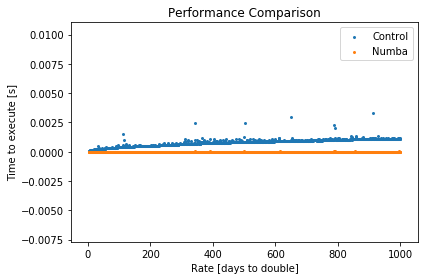

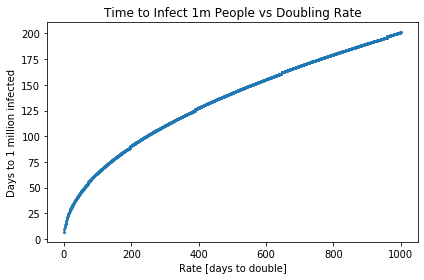

In [26]:
from numba import njit
from numba import jit
import numpy as np
import time
import timeit
import matplotlib.pyplot as plt
"""
Example 2: Corona Virus Simulation 

This example models the time it takes for the corona virus to affect 100% of a population of 
1 Million people based on various behavioral rules. 
Data obtained from: https://ourworldindata.org/coronavirus#our-data-sources

"""
print('\n\n===Example 2====\nCorona-19 Simulation\n')

pop = 1e6

def infect_time_control(infected, day2double):
    day = 1
    while infected < pop:
        infected = np.multiply(infected, np.power(2, np.divide(day, day2double)))
        day += 1
    return day

@njit
def infect_time_numba(infected, day2double):
    day = 1
    while infected < pop:
        infected = np.multiply(infected, np.power(2, np.divide(day, day2double)))
        day += 1
    return day

# Some Real-World Examples
people_infected = 1  # initial number of people infected
world_rate = 7  # rate for doubling in the world
us_rate = 5  # rate for doubling in the us
southKorea_rate = 28 # rate for doubling in South Korea

days_world = infect_time_numba(people_infected, world_rate)
days_us = infect_time_numba(people_infected, us_rate)
days_southKorea = infect_time_numba(people_infected, southKorea_rate)

print("It will take %d days to infect %d people in the World" % (days_world, pop))
print("It will take %d days to infect %d people in the U.S." % (days_us, pop))
print("It will take %d days to infect %d people in South Korea" % (days_southKorea, pop))

time_control = []
time_numba = []
rates = np.arange(1, 1001)
days_control = []
days_numba = []

for rate in rates:
    # Control
    start = time.time()
    days_control.append(infect_time_control(1, rate))
    end = time.time()
    time_control.append(end - start)
    
    # Numba
    start = time.time()
    days_numba.append(infect_time_numba(1, rate))
    end = time.time()
    time_numba.append(end - start)

fig, ax = plt.subplots()
fig.set_tight_layout(True)

ax.scatter(rates[1:],time_control[1:], linewidths=0.01, marker='.')
ax.scatter(rates[1:],time_numba[1:], linewidths=0.01, marker='.')
ax.set_xlabel('Rate [days to double]')
ax.set_ylabel('Time to execute [s]')
ax.legend(['Control', 'Numba'])
ax.set_title('Performance Comparison')

fig.show()
# fig.savefig('Performance Comparison.png')

fig2, ax2 = plt.subplots()
fig2.set_tight_layout(True)

ax2.scatter(rates,days, linewidths=0.01, marker='.')
ax2.set_xlabel('Rate [days to double]')
ax2.set_ylabel('Days to 1 million infected')
ax2.set_title('Time to Infect 1m People vs Doubling Rate')

fig2.show()
# fig2.savefig('Infected Time.png')